

---
---
* Importing Needed Libraries :



---




In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy import stats



---
* Loading the dataset :
---



In [ ]:
# Load dataset
df=pd.read_csv('/content/first inten project.csv')



---
* Dataset Preprocessing :
  - Checking for Null values, DataTypes , Memory Usage  .  
  - Checking for whiteSpaces and remove them  .
---



In [ ]:
# 1. Data Preprocessing
print("* Displaying the infos of the DataSet : ")
print(df.info())  # Check for null values and data types
print("#####################################################################################################################################")
print("* Checking for the existance of Null Values ")
print(df.isnull().sum())  # Check missing values
print("#####################################################################################################################################")
df.columns = df.columns.str.strip()  # Remove white spaces in column names

* Displaying the infos of the DataSet : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price       



---
* Convert to date time format:
---



In [ ]:
# Ensure 'date of reservation' is a string before using .str accessor
df['date of reservation'] = df['date of reservation'].astype(str)
# Convert to datetime, handling errors
df['date of reservation'] = pd.to_datetime(df['date of reservation'], errors='coerce')
# Check for any NaT values (invalid dates)
print("Rows with invalid dates:", df['date of reservation'].isna().sum())
#  drop NaT values
df.dropna(subset=['date of reservation'], inplace=True)  # Drop invalid dates


Rows with invalid dates: 37




---
* Checking for the existance of Outliers and handeling them :
---



In [ ]:
# 2. Checking for the existence of outliers and Handle them
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns  # Select only numeric columns
Q1 = df[numeric_cols].quantile(0.25)  # First quartile
Q3 = df[numeric_cols].quantile(0.75)  # Third quartile
IQR = Q3 - Q1                         # Interquartile range
# Detecting outliers
outlier_condition = (df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))
# Replacing outliers with NaN
df[numeric_cols] = df[numeric_cols].mask(outlier_condition, np.nan)
# Fill NaN values **only for numeric columns** using median
df[numeric_cols] = df[numeric_cols].apply(lambda col: col.fillna(col.median()))

In [ ]:
# Handling Outliers using Z-score
z_scores = np.abs(stats.zscore(df[numeric_cols]))
df[numeric_cols] = df[numeric_cols].mask(z_scores > 3, np.nan)
df[numeric_cols] = df[numeric_cols].apply(lambda col: col.fillna(col.median()))



---
* Feature engineering selection and extraction :
---



In [ ]:
# 3. Feature Engineering
# Feature Selection (Dropping unnecessary features)
df.drop(columns=['Booking_ID', 'date of reservation'], inplace=True)  # Booking ID and date might not be useful



---
* Encoding for categorical Data :

---



In [ ]:
# 4. Encoding Categorical Data
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le



---
* Splitting the data into train and test :
---



In [ ]:
# 5. Train-Test Split
X = df.drop(columns=['booking status'])  # Features
y = df['booking status']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)



---
* Scalling and Fit transform for the data :
---



In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


---
* Models training and calculating accuracies :
---



In [ ]:
# 6. Model Training and Accuracy Calculation
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = np.round(linear_model.predict(X_test))
linear_accuracy = accuracy_score(y_test, y_pred_linear)
print(f'Linear Regression Accuracy: {linear_accuracy:.4f}')
print("#####################################################################################################################################")
# Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
print(f'Logistic Regression Accuracy: {logistic_accuracy:.4f}')
print("#####################################################################################################################################")
# Polynomial Features + Linear Regression with varying degrees
degrees = [2, 3, 4]
poly_Linear_accuracies = []
for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    poly_linear_model = LinearRegression()
    poly_linear_model.fit(X_train_poly, y_train)
    y_pred_poly_linear = np.round(poly_linear_model.predict(X_test_poly))
    accuracy = accuracy_score(y_test, y_pred_poly_linear)
    poly_Linear_accuracies.append(accuracy)
    print(f'Polynomial Regression (Linear, Degree={d}) Accuracy: {accuracy:.4f}')
print("#####################################################################################################################################")
# Polynomial Features + Logistic Regression
poly_Logistic_accuracies = []
for d in degrees:
  poly = PolynomialFeatures(degree=d)
  X_train_poly = poly.fit_transform(X_train)
  X_test_poly = poly.transform(X_test)
  poly_model = LogisticRegression(max_iter=1000)
  poly_model.fit(X_train_poly, y_train)
  y_pred_poly = poly_model.predict(X_test_poly)
  poly_logistic_accuracy = accuracy_score(y_test, y_pred_poly)
  poly_Logistic_accuracies.append(poly_logistic_accuracy)
  print(f'Polynomial Regression (Logistic, Degree={d}) Accuracy: {poly_logistic_accuracy:.4f}')
print("#####################################################################################################################################")
# K-Nearest Neighbors (KNN) with different values of k
neighbors = [3, 5, 7, 9, 11]
knn_accuracies = []
for k in neighbors:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_knn)
    knn_accuracies.append(accuracy)
    print(f'KNN Accuracy (k={k}): {accuracy:.4f}')
print("#####################################################################################################################################")
# Performance Evaluation
print("Classification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_logistic))

Linear Regression Accuracy: 0.7290
#####################################################################################################################################
Logistic Regression Accuracy: 0.7359
#####################################################################################################################################
Polynomial Regression (Linear, Degree=2) Accuracy: 0.7535
Polynomial Regression (Linear, Degree=3) Accuracy: 0.7774
Polynomial Regression (Linear, Degree=4) Accuracy: 0.7866
#####################################################################################################################################
Polynomial Regression (Logistic, Degree=2) Accuracy: 0.7560
Polynomial Regression (Logistic, Degree=3) Accuracy: 0.7812


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Polynomial Regression (Logistic, Degree=4) Accuracy: 0.7921
#####################################################################################################################################
KNN Accuracy (k=3): 0.8294
KNN Accuracy (k=5): 0.8284
KNN Accuracy (k=7): 0.8271
KNN Accuracy (k=9): 0.8250
KNN Accuracy (k=11): 0.8234
#####################################################################################################################################
Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.65      0.42      0.51      3565
           1       0.76      0.89      0.82      7310

    accuracy                           0.74     10875
   macro avg       0.71      0.65      0.66     10875
weighted avg       0.72      0.74      0.72     10875





---
* Visulization Results :     
    * Accuracy Comparsion Via bar Chart .
    * Confusion Matrix for Logistic Regression.
    * KNN accuracy for different Number of neighbours .


---



<ipython-input-42-21c2d2791605>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


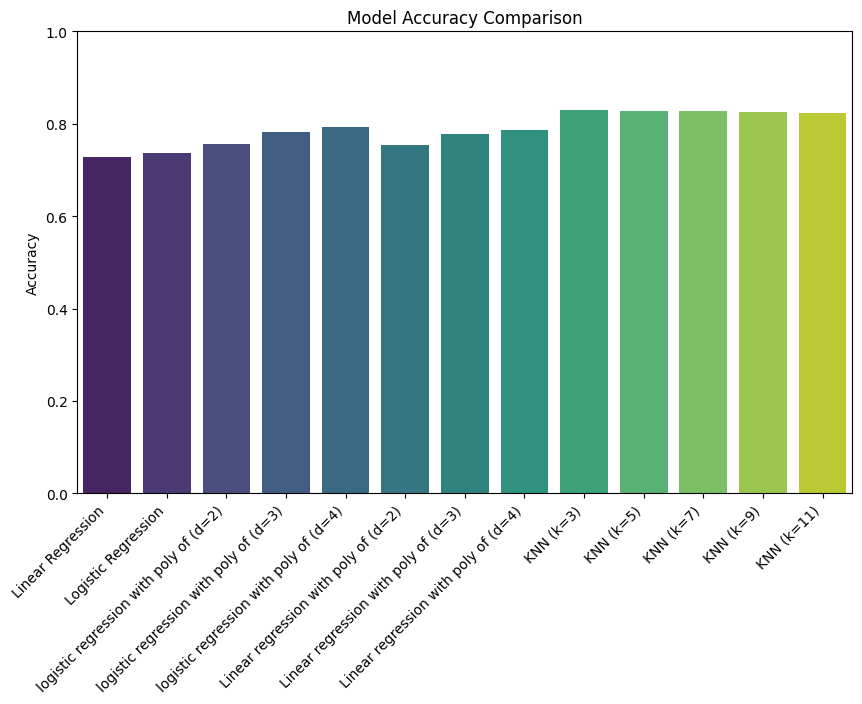

In [ ]:
# 7. Visualization
# Accuracy comparison bar chart
models = ['Linear Regression', 'Logistic Regression'] +[f'logistic regression with poly of (d={d})'for d in degrees ]+[f'Linear regression with poly of (d={d})'for d in degrees ]+[f'KNN (k={k})'for k in neighbors]
accuracies = [linear_accuracy, logistic_accuracy] +poly_Logistic_accuracies +poly_Linear_accuracies + knn_accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()

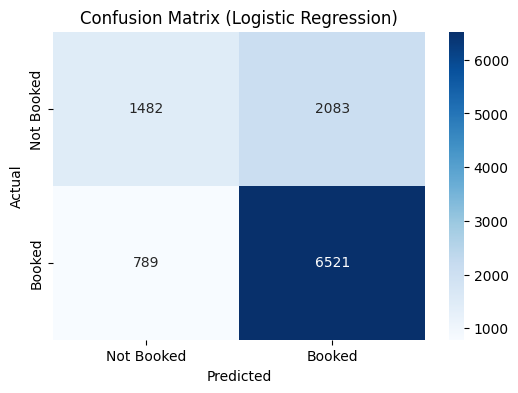

In [ ]:
# Confusion Matrix for Logistic Regression
plt.figure(figsize=(6, 4))
conf_matrix = confusion_matrix(y_test, y_pred_logistic)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Booked', 'Booked'], yticklabels=['Not Booked', 'Booked'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Logistic Regression)")
plt.show()

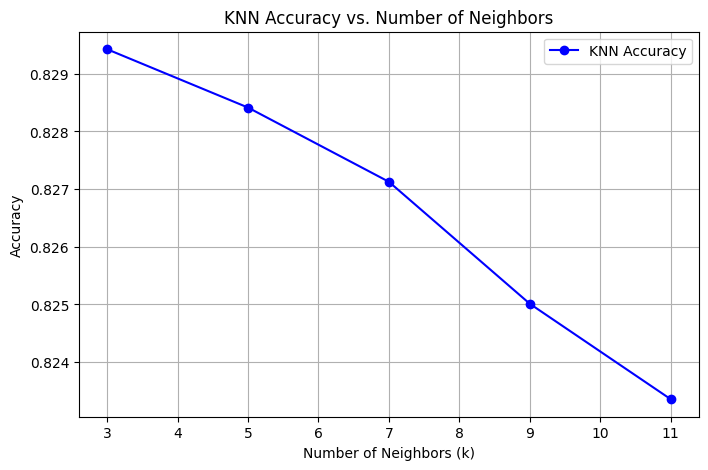

In [ ]:
# KNN accuracy trend plot
plt.figure(figsize=(8, 5))
plt.plot(neighbors, knn_accuracies, marker='o', linestyle='-', color='b', label='KNN Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs. Number of Neighbors')
plt.legend()
plt.grid()
plt.show()